# Taller 3 - Ciencia de datos Aplicada





Miembros del proyecto:

*   Alejandro Garcia Flores
*   Brayann Quevedo
*   Fabian Castellanos

# Planteamiento del problema

Una empresa del sector farmacéutico desea utilizar la información que posee de sus
empleados para estimar el nivel de satisfacción laboral que puedan tener en algún
momento y usarlo como insumo para detectar posibles fugas de personal. El CEO de la
farmacéutica le ha pedido a su equipo de científicos de datos que construyan un modelo
para tal fin y le proporcionen un conjunto de estrategias que permitan aumentar el nivel
de satisfacción laboral de sus empleados y evitar futuras fugas de personal.

# 0. Importación de Librerías.

In [ ]:
!pip install matplotlib==3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pylev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.0 MB)


In [ ]:
#Manejo de datos
import pandas as pd
import numpy as np
from datetime import datetime

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from pandas_profiling import ProfileReport

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.decomposition import PCA

#Librerías extras
import itertools
import pylev

# 0.1. Entendimiento del Negocio

|     Field                       |     Description                                                |
|---------------------------------|----------------------------------------------------------------|
|     Age                         |     Age of the employee                                        |
|     Attrition                   |     employee attrition                                         |
|     BusinessTravel              |     how frequently an employee travels for business purpose    |
|     DailyRate                   |     Daily wage of an employee                                  |
|     Department                  |     Employee department                                        |
|     DistanceFromHome            |     Distance from home to office in KM's                       |
|     Education                   |     Qualification of employee (masked, higher is better)       |
|     EducationField              |     Stream of Education                                        |
|     EmployeeCount               |     EmployeeCount                                              |
|     EmployeeNumber              |     employee number                                            |
|     EnvironmentSatisfaction     |     Environment    (higher is better)                          |
|     Gender                      |     Gender of employee                                         |
|     HourlyRate                  |     employee hourly rate                                       |
|     JobInvolvement              |     Job involvement (higher is better)                         |
|     JobLevel                    |     level of Job (higher is more important)                    |
|     JobRole                     |     job role of an employee                                    |
|     JobSatisfaction             |     if employee is satisfied?                                  |
|     MaritalStatus               |     employee is married or not                                 |
|     MonthlyIncome               |     income of an employee                                      |
|     MonthlyRate                 |     monthly rate of an employee                                |
|     NumCompaniesWorked          |     number of companies worked for                             |
|     Over18                      |     age over 18                                                |
|     OverTime                    |     employee works over time                                   |
|     PercentSalaryHike           |     salary hike                                                |
|     PerformanceRating           |     performance rate                                           |
|     RelationshipSatisfaction    |     Relationship satisfaction                                  |
|     StandardHours               |     per week standard work hours                               |
|     StockOptionLevel            |     company stock option level                                 |
|     TotalWorkingYears           |     total working years                                        |
|     TrainingTimesLastYears      |     Training time                                              |
|     WorkLifeBalance             |     Work life balance                                          |
|     YearsAtCompany              |     total years at current company                             |
|     YearsInCurrentRole          |     total years in current role                                |
|     YearsSinceLastPromotion     |     years since last promotion                                 |
|     YearsWithCurrManager        |     Years worked under current manager                         |

In [ ]:
url = 'https://raw.githubusercontent.com/a-garcia13/Taller-3-Ciencia-de-Datos/main/Data/Data_Taller_3.csv'

data = pd.read_csv(url, sep=";")
data.head()

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,80.0,0,8,0,1,6,4,0,5,0
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,80.0,1,10,3,3,10,7,1,7,0
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,80.0,0,7,3,3,0,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,80.0,0,8,3,3,8,7,3,0,0
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80.0,1,6,3,3,2,2,2,2,0


In [ ]:
data.shape

(1506, 36)

In [ ]:
data.dtypes

JobSatisfaction             float64
Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours               float64
StockOptionLevel            

# 1. Limpieza y preparación de los datos:

In [ ]:
ProfileReport(data)

Output hidden; open in https://colab.research.google.com to view.

Tareas a realizar
1. Separar JobStatisfaction a predecir del Dataset de entrenamiento
2. En Age, completar los datos faltantes y Corrregir Outliers
3. En Attrition, completar el dato vacio
4. Eliminar Employee count ya que es una columna constante, que solo tiene una entrada con valor distinto a 1
5. Eliminar EmployeeNumber ya que es una variable identificador
6. Arreglar las categorias de Gender
7. Arreglar las categorias de Marital Status
8. Revisar Monthly Income, ya que es probable que tenga datos mal, probablemente tenga relacion con HourlyRate, por lo que se pueda arreglar desde esta otra variable.
9. Eliminar Over18 ya que es una variable estatica
10. Eliminar StandardHours ya que es una variable estatica.
11. Estandarizar las categorias de EducationField
12. Estandarizar categorias de JobRole
13. YearsAtCompany tiene un valor muy extremo de 100 que hay que corregir

Entendimiento de datos: ¿Duplicados?, no, mediante el profiling podemos concluir y no es necesario repetir con otra función

In [ ]:
data = data.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'NewEmployee'])
data.head(5)

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,3,1,0,8,0,1,6,4,0,5
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,3,0,8,3,3,8,7,3,0
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2


* Entendimiento de datos: Buscar valores nulos de edad

In [ ]:
vacios = data[data["Age"].isna() == True]
vacios

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2
977,3.0,NaN,No,Non-Travel,999,Research & Development,26,1,Technical Degree,1,...,4,3,3,5,2,3,5,4,0,0
1340,3.0,NaN,No,Travel_Rarely,1266,Sales,10,4,Technical Degree,2,...,3,1,1,10,4,3,10,9,1,7


* Limpieza de datos para la columna de **edad**, estos valores de edad serán imputados a partir del promedio, ya que es una variable cuantitativa en rango.

In [ ]:
mean = data['Age'].mean()
mean

37.08649367930805

In [ ]:
data.loc[data["Age"].isna() == True, "Age"] = mean

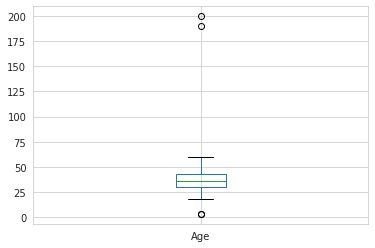

In [ ]:
b_plot = data.boxplot(column = ["Age"]) 

* Limpieza de datos para la columna de **edad**, los Outliers tambien se cambiaran por la media

In [ ]:
data.loc[data["Age"] > 100, "Age"] = mean
data.loc[data["Age"] < 18, "Age"] = mean

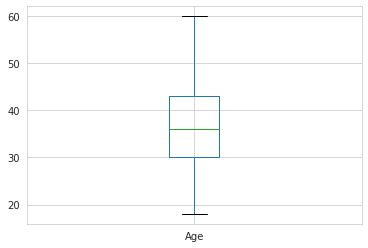

In [ ]:
b_plot = data.boxplot(column = ["Age"]) 

* Entendimiento de datos: Buscar valores nulos de desgaste (attrition)

In [ ]:
vacios = data[data["Attrition"].isna() == True]
vacios

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1337,2.0,28.0,NaN,Travel_Rarely,1172,Sales,3,3,Med,2,...,3,4,1,1,3,3,1,0,0,0


In [ ]:
data.loc[data["Attrition"].isna() == True, "Attrition"] = 'No'

[Text(0, 0, '1255'), Text(0, 0, '246'), Text(0, 0, '5')]

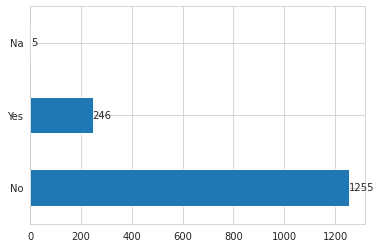

In [ ]:
ax = data['Attrition'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

* Entendimiento de datos: Visualizar los valores únicos del género

In [ ]:
data["Gender"].unique()

array(['Fem', 'Male', 'man', 'Female', 'female'], dtype=object)

* Limpieza de datos: De acuerdo con los valores de género, es necesario ajustar la información categórica

In [ ]:
data.loc[data["Gender"] == 'Fem', "Gender"] = 'Female'
data.loc[data["Gender"] == 'man', "Gender"] = 'Male'
data.loc[data["Gender"] == 'female', "Gender"] = 'Female'

* La visualización gráfica de la variable género es la siguiente:

[Text(0, 0, '907'), Text(0, 0, '599')]

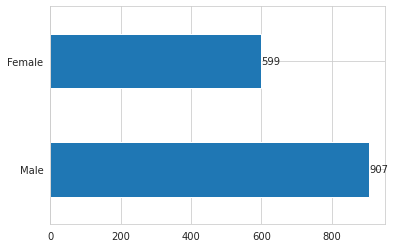

In [ ]:
ax = data['Gender'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

* Entendimiento de datos: Visualizar los valores únicos del estado civil

In [ ]:
data["MaritalStatus"].unique()

array(['Single', 'Married', 'Divorced', 'S', 'D', 'M'], dtype=object)

* Limpieza de datos: De acuerdo con los valores del estado civil, es necesario ajustar la información categórica

In [ ]:
data.loc[data["MaritalStatus"] == 'S', "MaritalStatus"] = 'Single'
data.loc[data["MaritalStatus"] == 'D', "MaritalStatus"] = 'Divorced'
data.loc[data["MaritalStatus"] == 'M', "MaritalStatus"] = 'Married'

[Text(0, 0, '685'), Text(0, 0, '484'), Text(0, 0, '337')]

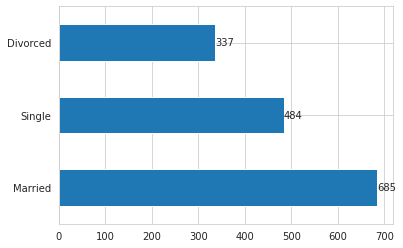

In [ ]:
ax = data['MaritalStatus'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

* Entendimiento de datos: Visualizar los valores extremos de la variable tarifa por hora (HourlyRate)

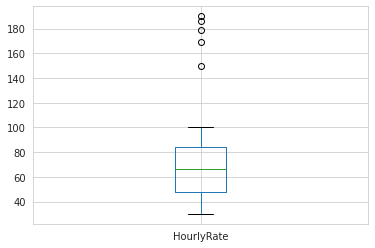

In [ ]:
b_plot = data.boxplot(column = ["HourlyRate"]) 

* Entendimiento de datos: Visualizar los valores extremos de la variable ingreso mensual (Monthly Income)

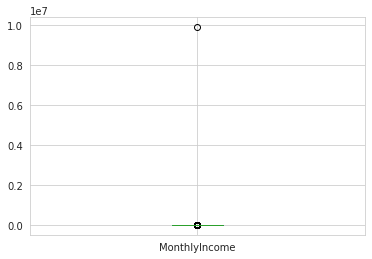

In [ ]:
b_plot = data.boxplot(column = ["MonthlyIncome"]) 

* Entendimiento de datos: Visualizar el comportamiento de la variable tarifa por hora (HourlyRate)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


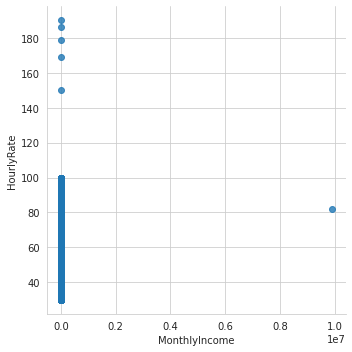

In [ ]:
sns.lmplot('MonthlyIncome', 'HourlyRate', data=data, fit_reg=False)
plt.show()

* Entendimiento de datos: Visualizar los valores extremos de la variable tarifa por hora (HourlyRate)


In [ ]:
outlier = data[data["MonthlyIncome"] > 20000]
outlier

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1326,2.0,32.0,Yes,Travel_Rarely,414,Sales,2,4,Marketing,3,...,3,3,0,7,3,2,2,2,2,2


* Limpieza de datos para la columna de **ingreso mensual**, los Outliers tambien se cambiaran por la mediana

In [ ]:
median = data['MonthlyIncome'].median()
median

4877.5

In [ ]:
data.loc[data["MonthlyIncome"] > 20000, "MonthlyIncome"] = median

* Entendimiento de datos: Visualizar los valores extremos de la variable ingreso mensual (Monthly Income)

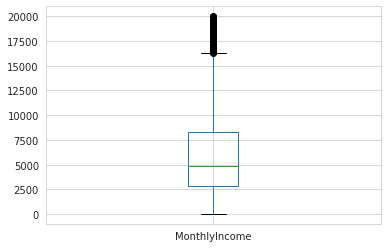

In [ ]:
b_plot = data.boxplot(column = ["MonthlyIncome"]) 

* Entendimiento de datos: Visualizar los valores únicos del campo de educación (Education Field)

In [ ]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources', 'Med'], dtype=object)

* Limpieza de datos: De acuerdo con los valores anteriores, es necesario ajustar la información categórica

In [ ]:
data.loc[data["EducationField"] == 'Med', "EducationField"] = 'Medical'
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

* Entendimiento de datos: Visualizar los valores únicos del puesto de trabajo (Job Role)

In [ ]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources',
       'Lab Tech', 'RH'], dtype=object)

* Limpieza de datos: De acuerdo con los valores anteriores, es necesario ajustar la información categórica

In [ ]:
data.loc[data["JobRole"] == 'Lab Tech', "JobRole"] = 'Laboratory Technician'
data.loc[data["JobRole"] == 'RH', "JobRole"] = 'Human Resources'
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

* Entendimiento de datos: Visualizar el promedio de años en la compañía (YearsAtCompany)

In [ ]:
mean = data['YearsAtCompany'].mean()
mean

7.041168658698539

* Entendimiento de datos: Visualizar los valores extremos de años en la compañía (YearsAtCompany)

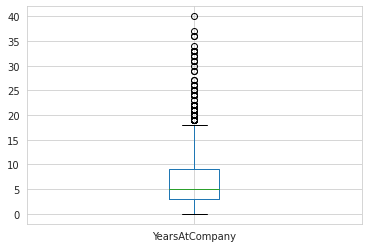

In [ ]:
data.loc[data["YearsAtCompany"] > 60, "YearsAtCompany"] = mean
b_plot = data.boxplot(column = ["YearsAtCompany"]) 

* Entendimiento de datos: Visualizar los valores únicos de satisfacción del trabajo (JobSatisfaction)

In [ ]:
data["JobSatisfaction"].unique()

array([ 4.,  2.,  3.,  1., nan])

* Entendimiento de datos: Buscar valores nulos de satisfacción del trabajo (JobSatisfaction)

In [ ]:
pred = data[data["JobSatisfaction"].isna() == True]
pred

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
15,NaN,29.0,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,2,...,3,3,1,10,1,3,10.0,9,8,8
69,NaN,36.0,Yes,Travel_Rarely,318,Research & Development,9,3,Medical,4,...,3,1,1,2,0,2,1.0,0,0,0
129,NaN,49.0,No,Travel_Rarely,470,Research & Development,20,4,Medical,3,...,3,3,0,16,2,2,15.0,11,5,11
265,NaN,29.0,No,Travel_Rarely,1210,Sales,2,3,Medical,1,...,3,2,2,10,2,3,0.0,0,0,0
604,NaN,42.0,No,Travel_Rarely,933,Research & Development,29,3,Life Sciences,2,...,3,4,1,10,3,2,9.0,8,7,8
739,NaN,27.0,No,Travel_Rarely,1055,Research & Development,2,4,Life Sciences,1,...,3,2,1,4,2,3,3.0,2,2,2
844,NaN,30.0,No,Travel_Rarely,852,Sales,10,3,Marketing,3,...,3,1,1,10,3,3,10.0,3,1,4
887,NaN,42.0,No,Travel_Frequently,458,Research & Development,26,5,Medical,1,...,3,3,0,20,6,3,1.0,0,0,0
907,NaN,44.0,No,Travel_Rarely,1099,Sales,5,3,Marketing,2,...,3,3,1,26,5,3,22.0,9,3,10
990,NaN,33.0,No,Travel_Frequently,1111,Sales,5,1,Life Sciences,2,...,3,1,0,8,2,4,5.0,4,1,2


In [ ]:
data = data[data['JobSatisfaction'].isna() == False]

* Limpieza de datos: Visualización gráfica de satisfacción del trabajo (JobSatisfaction)

[Text(0, 0, '473'), Text(0, 0, '454'), Text(0, 0, '288'), Text(0, 0, '279')]

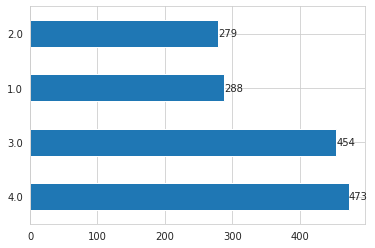

In [ ]:
ax = data['JobSatisfaction'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

# 2. Analisis Exploratorio

## 2.1 Variables Categoricas

#### 2.1.1 Variables Categoricas Cualitativas
Primero realizaremos un anailisis exploratorio para las variables categoricas cualitativas:
- Attrition
- BusinessTravel
- Department
- EducationField
- Gender
- JobRole
- MaritalStatus
- OverTime

[Text(0, 0, '1244'), Text(0, 0, '245'), Text(0, 0, '5')]

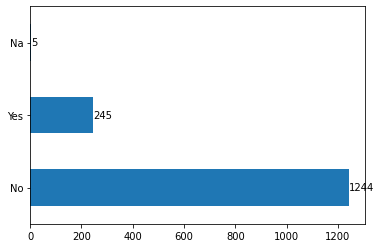

In [ ]:
ax = data['Attrition'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '1059'), Text(0, 0, '281'), Text(0, 0, '154')]

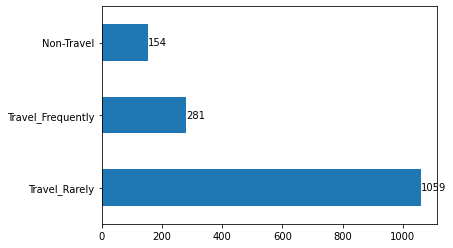

In [ ]:
ax = data['BusinessTravel'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

In [ ]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

<AxesSubplot:title={'center':'Department'}, ylabel='Department'>

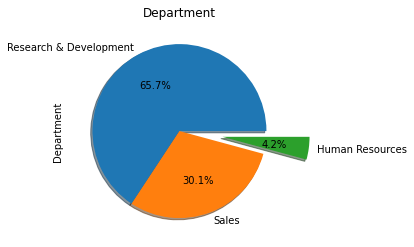

In [ ]:
data['Department'].value_counts().plot.pie(y='', title="Department", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.5), shadow=True, startangle=0)

In [ ]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

<AxesSubplot:title={'center':'EducationField'}, ylabel='EducationField'>

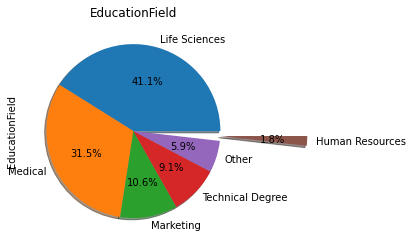

In [ ]:
data['EducationField'].value_counts().plot.pie(y='', title="EducationField", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0, 0, 0, 1), shadow=True, startangle=0)

[Text(0, 0, '901'), Text(0, 0, '593')]

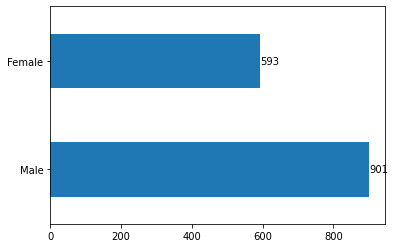

In [ ]:
ax = data['Gender'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

In [ ]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

<AxesSubplot:title={'center':'JobRole'}, ylabel='JobRole'>

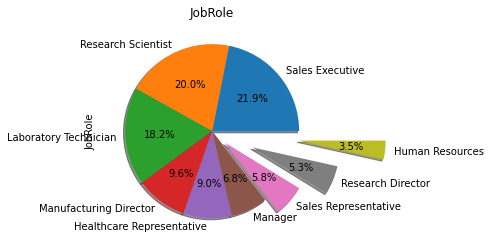

In [ ]:
data['JobRole'].value_counts().plot.pie(y='', title="JobRole", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0, 0, 0, 0, 0.2, 0.5, 1), shadow=True, startangle=0)

In [ ]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

<AxesSubplot:title={'center':'MaritalStatus'}, ylabel='MaritalStatus'>

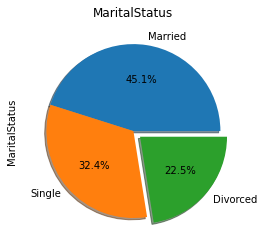

In [ ]:
data['MaritalStatus'].value_counts().plot.pie(y='', title="MaritalStatus", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), shadow=True, startangle=0)

[Text(0, 0, '933'), Text(0, 0, '424'), Text(0, 0, '137')]

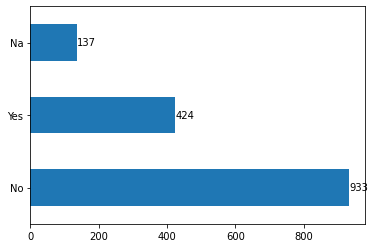

In [ ]:
ax = data['OverTime'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

#### 2.1.2 Variables Categoricas Cuantitativas

Ahora realizaremos un anailisis exploratorio para las variables categoricas cuantitativas:
- JobSatisfaction
- Education
- EnvironmentSatisfaction
- JobInvolvement
- JobLevel
- PerformanceRating
- RelationshipSatisfaction
- StockOptionLevel
- WorkLifeBalance

[Text(0, 0, '473'), Text(0, 0, '454'), Text(0, 0, '288'), Text(0, 0, '279')]

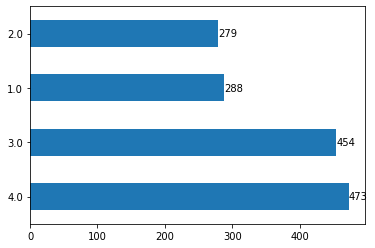

In [ ]:
ax = data['JobSatisfaction'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '579'),
 Text(0, 0, '401'),
 Text(0, 0, '294'),
 Text(0, 0, '170'),
 Text(0, 0, '48'),
 Text(0, 0, '2')]

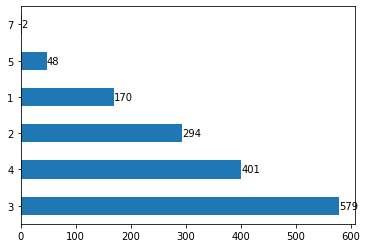

In [ ]:
ax = data['Education'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '460'), Text(0, 0, '459'), Text(0, 0, '290'), Text(0, 0, '285')]

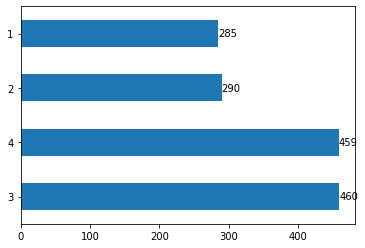

In [ ]:
ax = data['EnvironmentSatisfaction'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '874'), Text(0, 0, '382'), Text(0, 0, '151'), Text(0, 0, '87')]

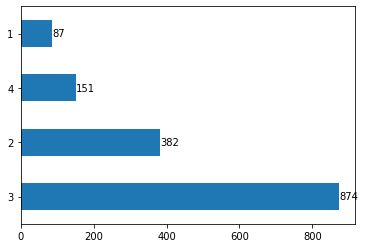

In [ ]:
ax = data['JobInvolvement'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '563'),
 Text(0, 0, '537'),
 Text(0, 0, '218'),
 Text(0, 0, '107'),
 Text(0, 0, '69')]

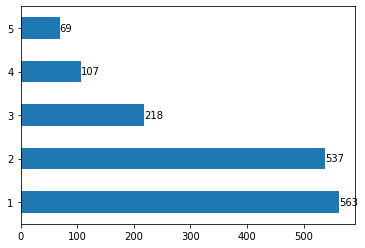

In [ ]:
ax = data['JobLevel'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '1264'), Text(0, 0, '230')]

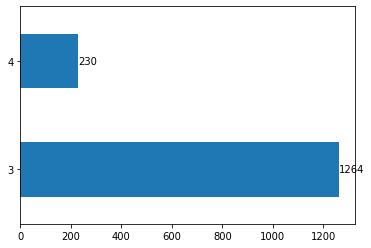

In [ ]:
ax = data['PerformanceRating'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '464'), Text(0, 0, '441'), Text(0, 0, '310'), Text(0, 0, '279')]

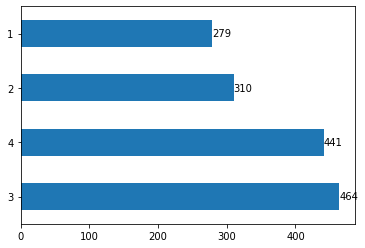

In [ ]:
ax = data['RelationshipSatisfaction'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '647'), Text(0, 0, '600'), Text(0, 0, '161'), Text(0, 0, '86')]

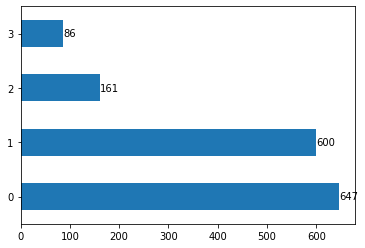

In [ ]:
ax = data['StockOptionLevel'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '909'), Text(0, 0, '350'), Text(0, 0, '153'), Text(0, 0, '82')]

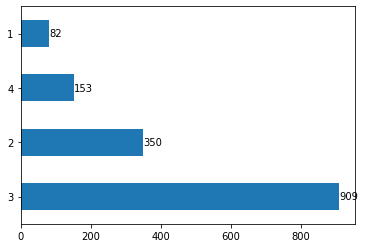

In [ ]:
ax = data['WorkLifeBalance'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

## 2.2 Variables Cuantitativas - Continuas

Ahora realizaremos un anailisis exploratorio para las variables cuantitativas:
- Age
- DailyRate
- DistanceFromhome
- HourlyRate
- MonthlyIncome
- MonthlyRate
- NumCompaniesWorked
- PercentSalaryHike
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager                   

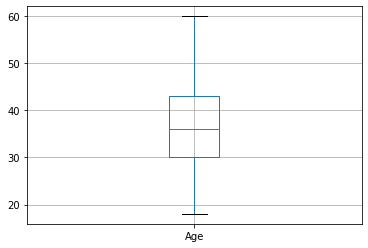

In [ ]:
b_plot = data.boxplot(column = ['Age'])

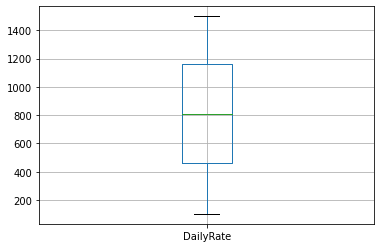

In [ ]:
b_plot = data.boxplot(column = ['DailyRate']) 

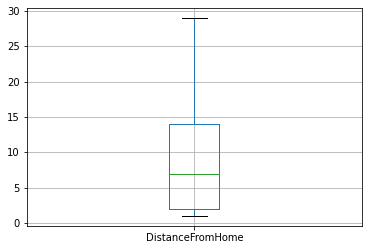

In [ ]:
b_plot = data.boxplot(column = ['DistanceFromHome']) 

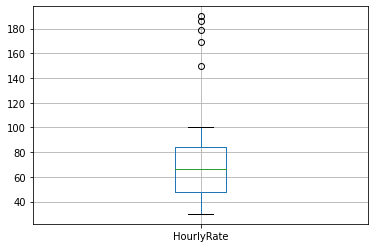

In [ ]:
b_plot = data.boxplot(column = ['HourlyRate']) 

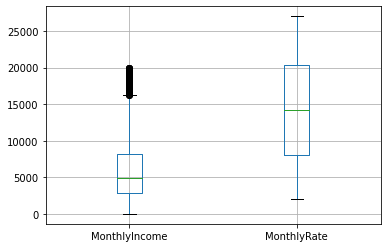

In [ ]:
b_plot = data.boxplot(column = ['MonthlyIncome', 'MonthlyRate']) 

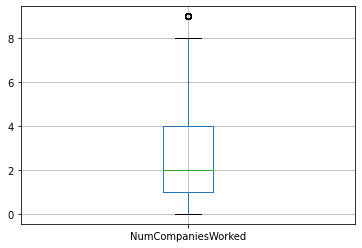

In [ ]:
b_plot = data.boxplot(column = ['NumCompaniesWorked']) 

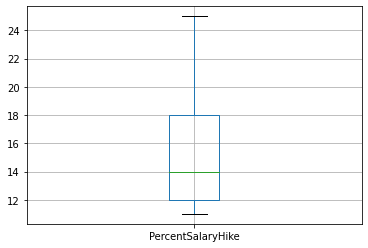

In [ ]:
b_plot = data.boxplot(column = ['PercentSalaryHike']) 

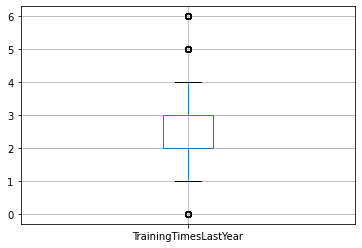

In [ ]:
b_plot = data.boxplot(column = ['TrainingTimesLastYear'])

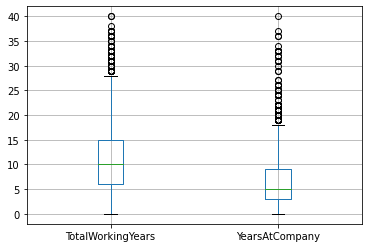

In [ ]:
b_plot = data.boxplot(column = ['TotalWorkingYears', 'YearsAtCompany']) 

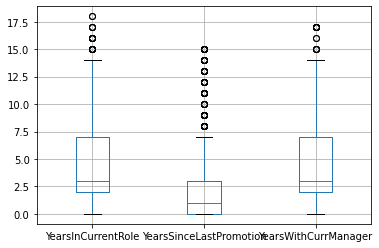

In [ ]:
b_plot = data.boxplot(column = ['YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']) 

## 2.3 Analisis multivariado

Para el analisis multivariado estudiaremos la relacion de la variable de interes JobSatisfaction con todas las otras variables.

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobSatisfaction,1.000000,-0.005921,0.033041,-0.000678,-0.010619,-0.009773,-0.071723,-0.014026,-0.004167,-0.010461,-0.008019,-0.056671,0.012828,-0.003696,-0.006297,0.001223,-0.021613,0.001689,-0.022694,-0.003722,-0.003484,-0.017950,-0.024450
Age,-0.005921,1.000000,0.015816,-0.017248,0.198179,0.005294,0.014485,0.026273,0.510167,0.499754,0.030247,0.300515,0.003423,0.000237,0.055441,0.038821,0.676272,-0.020346,-0.014983,0.314011,0.216205,0.217855,0.202293
DailyRate,0.033041,0.015816,1.000000,-0.001937,-0.020092,0.024917,0.036966,0.037402,-0.000552,0.006865,-0.026418,0.034036,0.020542,-0.000696,0.008011,0.042150,0.013335,-0.000848,-0.043343,-0.038491,0.009090,-0.035123,-0.033456
DistanceFromHome,-0.000678,-0.017248,-0.001937,1.000000,0.005601,-0.013389,0.013646,0.001217,-0.000993,-0.022514,0.025197,-0.033622,0.048587,0.033069,-0.001525,0.049665,-0.006519,-0.038545,-0.026106,0.004826,0.014514,0.004695,0.012686
Education,-0.010619,0.198179,-0.020092,0.005601,1.000000,-0.018804,0.011215,0.031655,0.107211,0.100321,-0.017066,0.132503,-0.010521,-0.027238,-0.007131,0.013622,0.150403,-0.025955,0.021927,0.073056,0.064206,0.052343,0.071668
EnvironmentSatisfaction,-0.009773,0.005294,0.024917,-0.013389,-0.018804,1.000000,-0.063689,-0.001455,0.004102,-0.005454,0.035536,0.013212,-0.029518,-0.025930,0.005326,0.005551,-0.001819,-0.013416,0.033973,0.000921,0.022953,0.016657,-0.004657
HourlyRate,-0.071723,0.014485,0.036966,0.013646,0.011215,-0.063689,1.000000,0.047155,-0.046795,-0.035262,-0.014925,0.010618,-0.009038,-0.001142,0.002016,0.052461,-0.021064,0.004898,-0.009598,-0.033059,-0.034605,-0.030752,-0.038323
JobInvolvement,-0.014026,0.026273,0.037402,0.001217,0.031655,-0.001455,0.047155,1.000000,-0.015503,-0.017243,-0.012270,0.021481,-0.016665,-0.027493,0.038142,0.026093,-0.012133,-0.012279,-0.022263,-0.029554,0.004950,-0.029832,0.018113
JobLevel,-0.004167,0.510167,-0.000552,-0.000993,0.107211,0.004102,-0.046795,-0.015503,1.000000,0.950424,0.043836,0.142462,-0.026724,-0.017950,0.022812,0.013473,0.783477,-0.023978,0.037209,0.540206,0.398933,0.356658,0.381067
MonthlyIncome,-0.010461,0.499754,0.006865,-0.022514,0.100321,-0.005454,-0.035262,-0.017243,0.950424,1.000000,0.037212,0.147094,-0.021095,-0.015570,0.027704,0.008207,0.773697,-0.028745,0.029681,0.522661,0.376343,0.350225,0.353299


### 2.3.1 JobSatisfaction vs Variables Categoricas

- Attrition

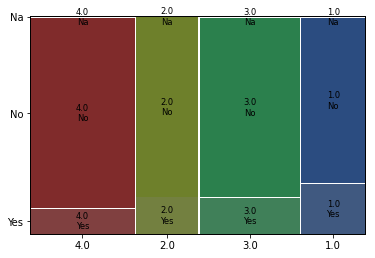

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data=data, index=['JobSatisfaction', 'Attrition'])
plt.show()

- BusinessTravel

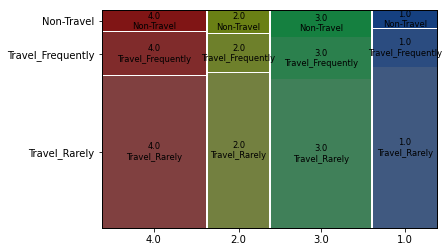

In [ ]:
mosaic(data=data, index=['JobSatisfaction', 'BusinessTravel'])
plt.show()

- Department

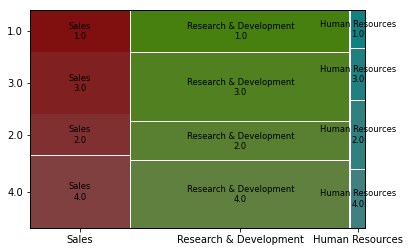

In [ ]:
mosaic(data=data, index=['Department', 'JobSatisfaction'])
plt.show()

- EducationField

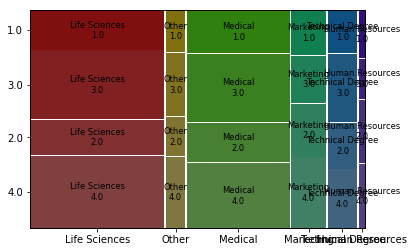

In [ ]:
mosaic(data=data, index=['EducationField', 'JobSatisfaction'])
plt.show()

- Gender

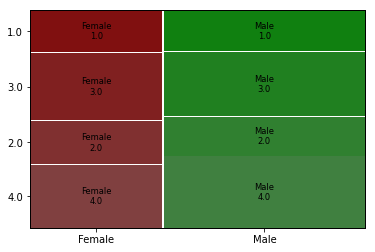

In [ ]:
mosaic(data=data, index=['Gender', 'JobSatisfaction'])
plt.show()

- JobRole

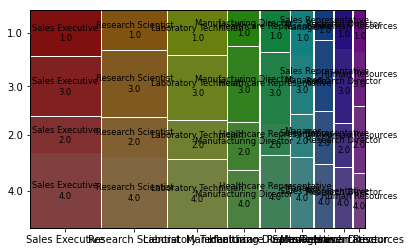

In [ ]:
mosaic(data=data, index=['JobRole', 'JobSatisfaction'])
plt.show()

- MaritalStatus

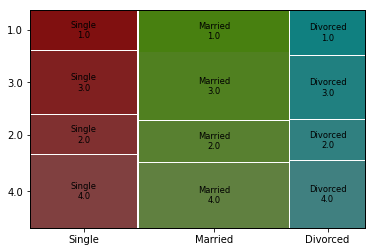

In [ ]:
mosaic(data=data, index=['MaritalStatus', 'JobSatisfaction'])
plt.show()

- OverTime

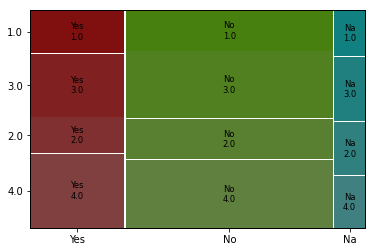

In [ ]:
mosaic(data=data, index=['OverTime', 'JobSatisfaction'])
plt.show()

- Education

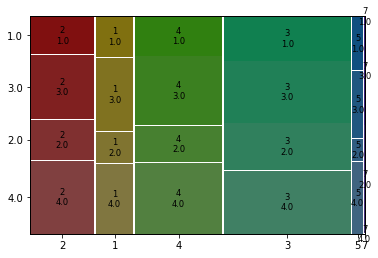

In [ ]:
mosaic(data=data, index=['Education', 'JobSatisfaction'])
plt.show()

- EnvironmentSatisfaction

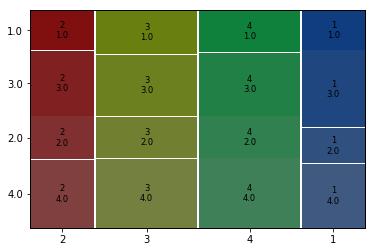

In [ ]:
mosaic(data=data, index=['EnvironmentSatisfaction', 'JobSatisfaction'])
plt.show()

- JobInvolvement


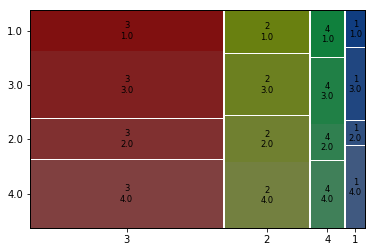

In [ ]:
mosaic(data=data, index=['JobInvolvement', 'JobSatisfaction'])
plt.show()

- JobLevel


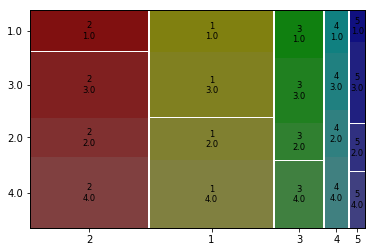

In [ ]:
mosaic(data=data, index=['JobLevel', 'JobSatisfaction'])
plt.show()

- PerformanceRating


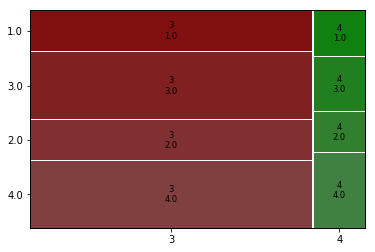

In [ ]:
mosaic(data=data, index=['PerformanceRating', 'JobSatisfaction'])
plt.show()

- RelationshipSatisfaction


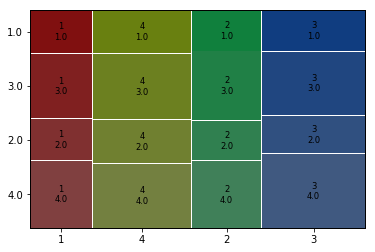

In [ ]:
mosaic(data=data, index=['RelationshipSatisfaction', 'JobSatisfaction'])
plt.show()

- StockOptionLevel


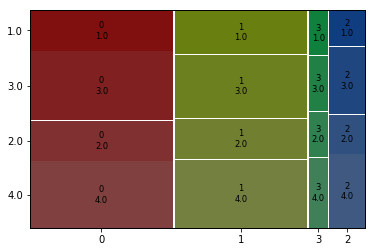

In [ ]:
mosaic(data=data, index=['StockOptionLevel', 'JobSatisfaction'])
plt.show()

- WorkLifeBalance

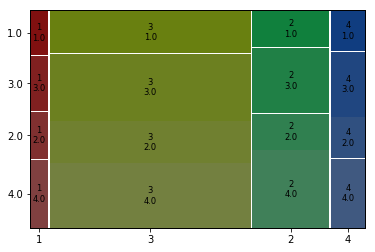

In [ ]:
mosaic(data=data, index=['WorkLifeBalance', 'JobSatisfaction'])
plt.show()

### 2.3.2 JobSatisfaction vs Variables Numericas continuas

- Age  

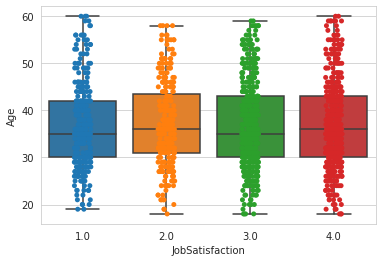

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='Age',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="Age",data= data)

- DailyRate


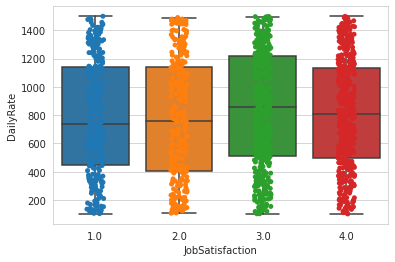

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='DailyRate',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="DailyRate",data= data)

- DistanceFromHome


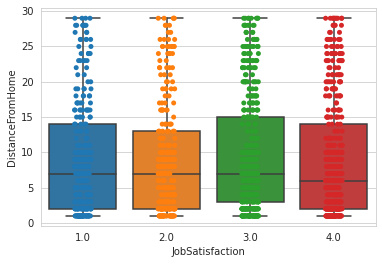

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='DistanceFromHome',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="DistanceFromHome",data= data)

- HourlyRate


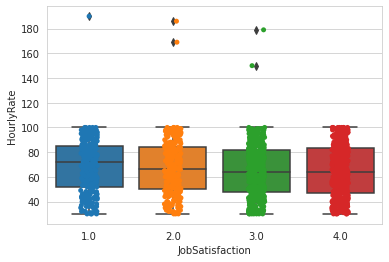

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='HourlyRate',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="HourlyRate",data= data)

- MonthlyIncome


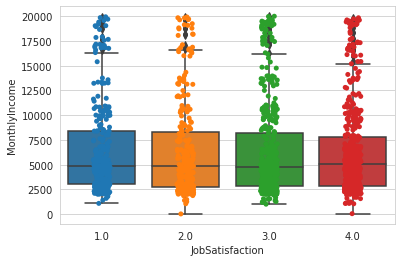

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='MonthlyIncome',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="MonthlyIncome",data= data)

- MonthlyRate


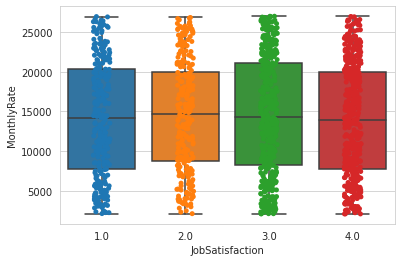

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='MonthlyRate',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="MonthlyRate",data= data)

- NumCompaniesWorked


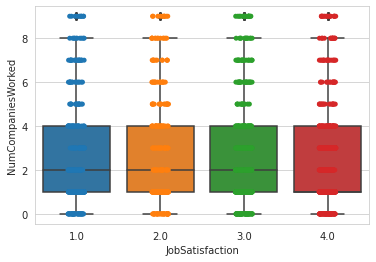

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='NumCompaniesWorked',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="NumCompaniesWorked",data= data)

- PercentSalaryHike


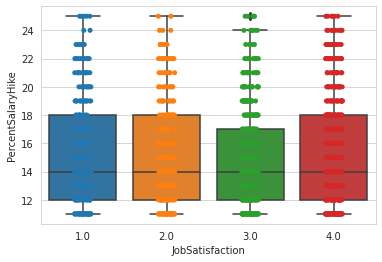

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='PercentSalaryHike',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="PercentSalaryHike",data= data)

- TotalWorkingYears


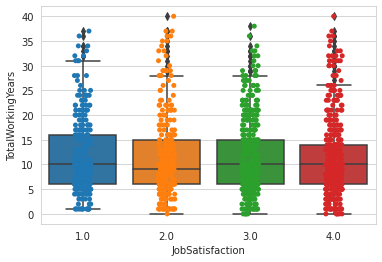

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='TotalWorkingYears',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="TotalWorkingYears",data= data)

- TrainingTimesLastYear


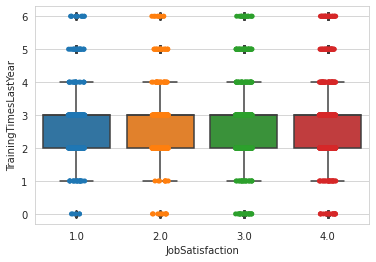

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='TrainingTimesLastYear',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="TrainingTimesLastYear",data= data)

- YearsAtCompany


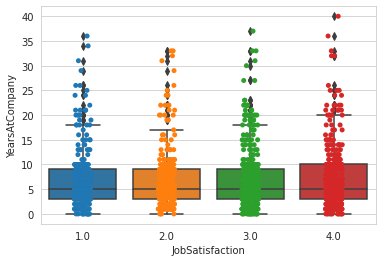

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='YearsAtCompany',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="YearsAtCompany",data= data)

- YearsInCurrentRole


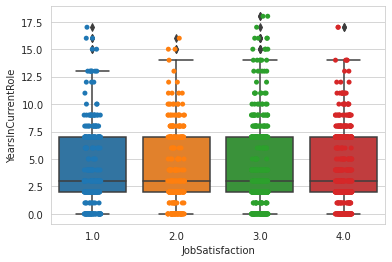

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='YearsInCurrentRole',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="YearsInCurrentRole",data= data)

- YearsSinceLastPromotion


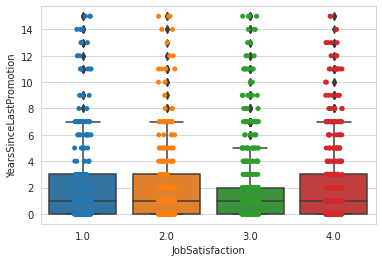

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='YearsSinceLastPromotion',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="YearsSinceLastPromotion",data= data)

- YearsWithCurrManager   

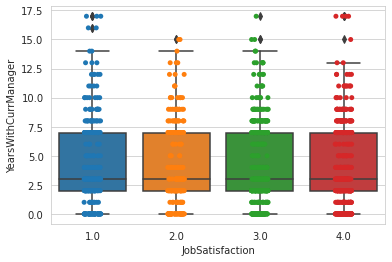

In [ ]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='YearsWithCurrManager',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="YearsWithCurrManager",data= data)

## 2.4 Conclusiones del analisis

No hay dimensiones que afecten de una manera clara y significativa la variable objetivo, por lo que la mejor manera de hacer seleccion de features, es usar terminos de regularizacion sobre los modelos, como Lasso en caso de una regresion logistica. De esta manera cada algoritmo seleccionara las variables que afecten su rendimiento de manera mas favorable

# 3. Preparacion del modelo

Paso 1: convertir las variables categoricas-cualitativas a numericas a traves de un one-hot.
- Attrition
- BusinessTravel
- Department
- EducationField
- Gender
- JobRole
- MaritalStatus
- OverTime

In [ ]:
data_main = data.copy()
data_main

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,4.0,41.000000,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,3,1,0,8,0,1,6.0,4,0,5
1,2.0,49.000000,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,4,1,10,3,3,10.0,7,1,7
2,3.0,37.000000,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0.0,0,0,0
3,3.0,33.000000,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,3,0,8,3,3,8.0,7,3,0
4,2.0,37.078471,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,3,4,1,6,3,3,2.0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,4.0,36.000000,No,Non-Travel,845,Sales,1,5,Medical,4,...,3,2,0,7,6,3,1.0,0,0,0
1502,2.0,49.000000,No,Travel_Rarely,174,Sales,8,4,Technical Degree,4,...,3,2,1,22,3,3,9.0,8,2,3
1503,1.0,27.000000,No,Travel_Rarely,1302,Research & Development,19,3,Other,4,...,3,1,2,7,3,3,7.0,7,0,7
1504,2.0,44.000000,Yes,Travel_Frequently,429,Research & Development,1,2,Medical,3,...,3,3,3,6,2,2,5.0,3,2,3


In [ ]:
y = pd.get_dummies(data_main.Attrition, prefix='Attrition')
z = pd.get_dummies(data_main.BusinessTravel, prefix='BusinessTravel')
f = pd.get_dummies(data_main.Department, prefix='Department')
x = pd.get_dummies(data_main.EducationField, prefix='EducationField')
w = pd.get_dummies(data_main.Gender, prefix='Gender')
a = pd.get_dummies(data_main.JobRole, prefix='JobRole')
b = pd.get_dummies(data_main.MaritalStatus, prefix='MaritalStatus')
c = pd.get_dummies(data_main.OverTime, prefix='OverTime')
print(y.head())

   Attrition_Na  Attrition_No  Attrition_Yes
0             0             0              1
1             0             1              0
2             0             0              1
3             0             1              0
4             0             1              0


In [ ]:
data_main =  data_main.join(y).drop(columns=['Attrition'])
data_main =  data_main.join(z).drop(columns=['BusinessTravel'])
data_main =  data_main.join(f).drop(columns=['Department'])
data_main =  data_main.join(x).drop(columns=['EducationField'])
data_main =  data_main.join(w).drop(columns=['Gender'])
data_main =  data_main.join(a).drop(columns=['JobRole'])
data_main =  data_main.join(b).drop(columns=['MaritalStatus'])
data_main =  data_main.join(c).drop(columns=['OverTime'])
data_main

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Na,OverTime_No,OverTime_Yes
0,4.0,41.000000,1102,1,2,2,94,3,2,5993.0,...,0,0,1,0,0,0,1,0,0,1
1,2.0,49.000000,279,8,1,3,61,2,2,5130.0,...,0,1,0,0,0,1,0,0,1,0
2,3.0,37.000000,1373,2,2,4,92,2,1,2090.0,...,0,0,0,0,0,0,1,0,0,1
3,3.0,33.000000,1392,3,4,4,56,3,1,2909.0,...,0,1,0,0,0,1,0,0,0,1
4,2.0,37.078471,591,2,1,1,40,3,1,3468.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,4.0,36.000000,845,1,5,4,45,3,2,6653.0,...,0,0,1,0,0,0,1,0,1,0
1502,2.0,49.000000,174,8,4,4,56,2,4,13120.0,...,0,0,1,0,0,1,0,0,1,0
1503,1.0,27.000000,1302,19,3,4,67,2,1,4066.0,...,0,0,0,0,1,0,0,0,1,0
1504,2.0,44.000000,429,1,2,3,99,3,1,2342.0,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
ProfileReport(data_main)

Output hidden; open in https://colab.research.google.com to view.

Paso 2: dividir test y training

In [ ]:
train, test = train_test_split(data_main, test_size=0.2, random_state=33)
train.head()

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Na,OverTime_No,OverTime_Yes
932,3.0,29.0,806,7,3,2,39,3,1,3339.0,...,0,0,0,0,1,0,0,0,0,1
788,3.0,28.0,857,10,3,3,59,3,2,3660.0,...,0,1,0,0,0,0,1,0,1,0
150,2.0,40.0,1395,26,3,2,54,3,2,5605.0,...,0,1,0,0,1,0,0,0,1,0
1401,2.0,55.0,189,26,4,3,71,4,5,19636.0,...,0,0,0,0,0,1,0,0,0,1
174,1.0,45.0,1268,4,2,3,30,3,2,5006.0,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
X_train, y_train = train.drop(['JobSatisfaction'],axis=1), train['JobSatisfaction'] 
display(X_train)
y_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Na,OverTime_No,OverTime_Yes
932,29.0,806,7,3,2,39,3,1,3339.0,17285,...,0,0,0,0,1,0,0,0,0,1
788,28.0,857,10,3,3,59,3,2,3660.0,7909,...,0,1,0,0,0,0,1,0,1,0
150,40.0,1395,26,3,2,54,3,2,5605.0,8504,...,0,1,0,0,1,0,0,0,1,0
1401,55.0,189,26,4,3,71,4,5,19636.0,25811,...,0,0,0,0,0,1,0,0,0,1
174,45.0,1268,4,2,3,30,3,2,5006.0,6319,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,36.0,1456,13,5,2,96,2,2,6134.0,8658,...,0,0,1,0,1,0,0,0,0,1
663,21.0,1427,18,1,4,65,3,1,2693.0,8870,...,0,1,0,0,0,0,1,0,1,0
582,40.0,791,2,2,3,38,4,2,4244.0,9931,...,0,0,0,0,0,1,0,0,1,0
395,43.0,313,21,3,4,61,3,1,2258.0,15238,...,0,0,0,0,0,1,0,0,1,0


932     3.0
788     3.0
150     2.0
1401    2.0
174     1.0
       ... 
1236    1.0
663     4.0
582     2.0
395     4.0
1054    2.0
Name: JobSatisfaction, Length: 1195, dtype: float64

In [ ]:
X_test, y_test = test.drop(['JobSatisfaction'],axis=1), test['JobSatisfaction'] 
display(X_test)
y_test

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Na,OverTime_No,OverTime_Yes
1450,35.0,1146,26,4,3,31,3,3,8837.0,16642,...,0,0,0,0,0,0,1,0,0,1
549,34.0,970,8,2,2,96,3,2,6142.0,7360,...,0,0,0,0,0,0,1,0,1,0
235,43.0,1034,16,3,4,80,3,4,16064.0,7744,...,0,0,0,0,0,1,0,0,0,1
842,28.0,1485,12,1,3,79,3,1,2515.0,22955,...,0,0,0,0,0,1,0,0,0,1
1288,35.0,1180,2,2,2,90,3,2,5762.0,24442,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,30.0,1465,1,3,4,63,3,1,3579.0,9369,...,0,1,0,0,0,1,0,0,0,1
443,22.0,1368,4,1,3,99,2,1,3894.0,9129,...,0,0,0,0,0,0,1,0,1,0
641,32.0,379,5,2,2,48,3,2,6524.0,8891,...,0,0,1,0,0,1,0,0,1,0
1342,34.0,1480,4,3,3,64,3,3,9713.0,24444,...,0,0,1,0,0,1,0,0,0,1


1450    4.0
549     3.0
235     4.0
842     4.0
1288    4.0
       ... 
886     2.0
443     3.0
641     2.0
1342    4.0
493     3.0
Name: JobSatisfaction, Length: 299, dtype: float64

# 4. Implementacion del modelo

## 4.1 Regresión logistica

In [ ]:
estimators = [
        ("normalizar", StandardScaler()),
        ('varianceThreshold',VarianceThreshold()),
        ('bestFeatures', SelectKBest(f_classif)),
        ('polinomial', PolynomialFeatures(include_bias=False)),
        ('regresion', LogisticRegression())          
    ]

pipe = Pipeline(estimators)

parameters = {
              'normalizar': [StandardScaler(), MinMaxScaler(), 'passthrought'],
              'varianceThreshold__threshold':[(.9* (1 - .9)),(.8* (1 - .8)),(.7* (1 - .7)),'passthrough'],
              'bestFeatures__k':[2,3,4,5,10,'all','passthrough'], 
              'polinomial__degree':[2,3,'passthrough'],
              'regresion__penalty': ['l2', 'none']
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='f1', cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)
best_lr = grid_search.best_estimator_
grid_search.best_params_

Fitting 10 folds for each of 504 candidates, totalling 5040 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3640 fits failed out of a total of 5040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
840 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist

{'bestFeatures__k': 2,
 'normalizar': StandardScaler(),
 'polinomial__degree': 2,
 'regresion__penalty': 'l2',
 'varianceThreshold__threshold': 0.08999999999999998}

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bestFeatures__k,param_normalizar,param_polinomial__degree,param_regresion__penalty,param_varianceThreshold__threshold,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.087818,0.016055,0.007681,0.003194,2,StandardScaler(),2,l2,0.09,"{'bestFeatures__k': 2, 'normalizar': StandardS...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.100928,0.019066,0.005880,0.001215,2,StandardScaler(),2,l2,0.16,"{'bestFeatures__k': 2, 'normalizar': StandardS...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343
2,0.086801,0.017342,0.005848,0.001326,2,StandardScaler(),2,l2,0.21,"{'bestFeatures__k': 2, 'normalizar': StandardS...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342
3,0.012708,0.002516,0.000000,0.000000,2,StandardScaler(),2,l2,passthrough,"{'bestFeatures__k': 2, 'normalizar': StandardS...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341
4,0.069311,0.018880,0.006344,0.001812,2,StandardScaler(),2,none,0.09,"{'bestFeatures__k': 2, 'normalizar': StandardS...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.002487,0.000618,0.000000,0.000000,passthrough,passthrought,passthrough,l2,passthrough,"{'bestFeatures__k': 'passthrough', 'normalizar...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161
500,0.003149,0.001390,0.000000,0.000000,passthrough,passthrought,passthrough,none,0.09,"{'bestFeatures__k': 'passthrough', 'normalizar...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160
501,0.002001,0.000172,0.000000,0.000000,passthrough,passthrought,passthrough,none,0.16,"{'bestFeatures__k': 'passthrough', 'normalizar...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159
502,0.002433,0.001602,0.000000,0.000000,passthrough,passthrought,passthrough,none,0.21,"{'bestFeatures__k': 'passthrough', 'normalizar...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,472


In [ ]:
best_lr.classes_

array([1., 2., 3., 4.])

In [ ]:
y_pred_train = best_lr.predict(X_train)
y_pred_test = best_lr.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       229
         2.0       0.00      0.00      0.00       223
         3.0       0.30      0.16      0.21       352
         4.0       0.35      0.89      0.50       391

    accuracy                           0.34      1195
   macro avg       0.16      0.26      0.18      1195
weighted avg       0.20      0.34      0.22      1195

Test:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        59
         2.0       0.00      0.00      0.00        56
         3.0       0.37      0.19      0.25       102
         4.0       0.29      0.87      0.43        82

    accuracy                           0.30       299
   macro avg       0.16      0.26      0.17       299
weighted avg       0.20      0.30      0.20       299



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

## 4.2 DecisionTreeClassifier

In [ ]:
estimators = [
        ("normalizar", StandardScaler()),
        ("rfc", DecisionTreeClassifier()),                  
    ]

pipe = Pipeline(estimators)

parameters = {
              'normalizar': [StandardScaler(), MinMaxScaler(),'passthrough'], 
              'rfc__criterion': ['gini', 'entropy'],
              'rfc__splitter': ['best','random'],
              'rfc__max_depth': [None,10,20,30],
              'rfc__min_samples_split': [2,3,4,5],
              'rfc__max_features':['auto']
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='f1', cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)
best_dt = grid_search.best_estimator_
grid_search.best_params_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


{'normalizar': StandardScaler(),
 'rfc__criterion': 'gini',
 'rfc__max_depth': None,
 'rfc__max_features': 'auto',
 'rfc__min_samples_split': 2,
 'rfc__splitter': 'best'}

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalizar,param_rfc__criterion,param_rfc__max_depth,param_rfc__max_features,param_rfc__min_samples_split,param_rfc__splitter,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024318,0.012074,0.007890,0.004366,StandardScaler(),gini,None,auto,2,best,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.018356,0.006516,0.005652,0.002720,StandardScaler(),gini,None,auto,2,random,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122
2,0.020952,0.007822,0.005218,0.001196,StandardScaler(),gini,None,auto,3,best,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123
3,0.014521,0.002684,0.005859,0.002638,StandardScaler(),gini,None,auto,3,random,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124
4,0.017539,0.005635,0.005402,0.002149,StandardScaler(),gini,None,auto,4,best,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.013319,0.005398,0.004982,0.001134,passthrough,entropy,30,auto,3,random,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67
188,0.017682,0.004437,0.005656,0.002233,passthrough,entropy,30,auto,4,best,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
189,0.009814,0.003279,0.005815,0.003114,passthrough,entropy,30,auto,4,random,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69
190,0.016793,0.003807,0.005360,0.002339,passthrough,entropy,30,auto,5,best,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191


In [ ]:
y_pred_train = best_dt.predict(X_train)
y_pred_test = best_dt.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       229
         2.0       1.00      1.00      1.00       223
         3.0       1.00      1.00      1.00       352
         4.0       1.00      1.00      1.00       391

    accuracy                           1.00      1195
   macro avg       1.00      1.00      1.00      1195
weighted avg       1.00      1.00      1.00      1195

Test:
              precision    recall  f1-score   support

         1.0       0.18      0.19      0.18        59
         2.0       0.27      0.25      0.26        56
         3.0       0.41      0.32      0.36       102
         4.0       0.27      0.35      0.31        82

    accuracy                           0.29       299
   macro avg       0.28      0.28      0.28       299
weighted avg       0.30      0.29      0.29       299



## 4.3 KNeighborsClassifier

In [ ]:
estimators = [
        ("normalizar", StandardScaler()),
        ('pca', PCA()),
        ("knn", KNeighborsClassifier())                  
    ]

pipe = Pipeline(estimators)

parameters = {
              'normalizar': [StandardScaler(), MinMaxScaler(),'passthrough'],
              'pca': [PCA(), 'passthrough'],
              'knn__n_neighbors':[1,2,3,4,5],
              "knn__algorithm": ["auto",  "ball_tree", "kd_tree", "brute"]
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='f1', cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)
best_kn = grid_search.best_estimator_
grid_search.best_params_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


{'knn__algorithm': 'auto',
 'knn__n_neighbors': 1,
 'normalizar': StandardScaler(),
 'pca': PCA()}

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__algorithm,param_knn__n_neighbors,param_normalizar,param_pca,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022375,0.005054,0.018265,0.004281,auto,1,StandardScaler(),PCA(),"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.013064,0.002989,0.013673,0.002190,auto,1,StandardScaler(),passthrough,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87
2,0.022195,0.009896,0.015220,0.002205,auto,1,MinMaxScaler(),PCA(),"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86
3,0.012537,0.003180,0.014911,0.002598,auto,1,MinMaxScaler(),passthrough,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
4,0.017684,0.005018,0.016374,0.005034,auto,1,passthrough,PCA(),"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.013140,0.002576,0.019240,0.007539,brute,5,StandardScaler(),passthrough,"{'knn__algorithm': 'brute', 'knn__n_neighbors'...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
116,0.019635,0.006131,0.018945,0.004138,brute,5,MinMaxScaler(),PCA(),"{'knn__algorithm': 'brute', 'knn__n_neighbors'...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
117,0.016091,0.008430,0.015331,0.001389,brute,5,MinMaxScaler(),passthrough,"{'knn__algorithm': 'brute', 'knn__n_neighbors'...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
118,0.015521,0.004971,0.016110,0.002345,brute,5,passthrough,PCA(),"{'knn__algorithm': 'brute', 'knn__n_neighbors'...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119


In [ ]:
y_pred_train = best_kn.predict(X_train)
y_pred_test = best_kn.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       229
         2.0       1.00      1.00      1.00       223
         3.0       1.00      1.00      1.00       352
         4.0       1.00      1.00      1.00       391

    accuracy                           1.00      1195
   macro avg       1.00      1.00      1.00      1195
weighted avg       1.00      1.00      1.00      1195

Test:
              precision    recall  f1-score   support

         1.0       0.21      0.22      0.21        59
         2.0       0.16      0.16      0.16        56
         3.0       0.34      0.30      0.32       102
         4.0       0.24      0.27      0.25        82

    accuracy                           0.25       299
   macro avg       0.24      0.24      0.24       299
weighted avg       0.26      0.25      0.25       299



* Este modelo tiene un overfit muy fuerte

## 4.4 SVMClassifier

In [ ]:
estimators = [
        ("normalizar", StandardScaler()),
        ("svc", SVC()),                  
    ]

pipe = Pipeline(estimators)

parameters = {
              'normalizar': [StandardScaler(),'passthrough'],
              'svc__C':[0.5, 1, 2], #Termino de regularizacion, es inversamente proporcional a C
              "svc__kernel": ["poly", "rbf", "sigmoid"]
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='f1', cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)
best_svm = grid_search.best_estimator_
grid_search.best_params_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


{'normalizar': StandardScaler(), 'svc__C': 0.5, 'svc__kernel': 'poly'}

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalizar,param_svc__C,param_svc__kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.203105,0.014859,0.018178,0.007980,StandardScaler(),0.5,poly,"{'normalizar': StandardScaler(), 'svc__C': 0.5...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.250551,0.017017,0.030754,0.007681,StandardScaler(),0.5,rbf,"{'normalizar': StandardScaler(), 'svc__C': 0.5...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
2,0.255053,0.013409,0.022033,0.003179,StandardScaler(),0.5,sigmoid,"{'normalizar': StandardScaler(), 'svc__C': 0.5...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,0.192995,0.012185,0.015070,0.000367,StandardScaler(),1,poly,"{'normalizar': StandardScaler(), 'svc__C': 1, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
4,0.235989,0.002778,0.033718,0.006795,StandardScaler(),1,rbf,"{'normalizar': StandardScaler(), 'svc__C': 1, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
5,0.250123,0.008751,0.020986,0.000710,StandardScaler(),1,sigmoid,"{'normalizar': StandardScaler(), 'svc__C': 1, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
6,0.210961,0.007746,0.015720,0.001086,StandardScaler(),2,poly,"{'normalizar': StandardScaler(), 'svc__C': 2, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
7,0.263566,0.004567,0.028785,0.002351,StandardScaler(),2,rbf,"{'normalizar': StandardScaler(), 'svc__C': 2, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
8,0.255197,0.020956,0.021271,0.001783,StandardScaler(),2,sigmoid,"{'normalizar': StandardScaler(), 'svc__C': 2, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.172836,0.011763,0.015220,0.001539,passthrough,0.5,poly,"{'normalizar': 'passthrough', 'svc__C': 0.5, '...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


In [ ]:
y_pred_train = best_svm.predict(X_train)
y_pred_test = best_svm.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

         1.0       0.98      0.22      0.36       229
         2.0       1.00      0.22      0.37       223
         3.0       0.91      0.39      0.55       352
         4.0       0.41      1.00      0.59       391

    accuracy                           0.53      1195
   macro avg       0.83      0.46      0.47      1195
weighted avg       0.78      0.53      0.49      1195

Test:
              precision    recall  f1-score   support

         1.0       0.29      0.03      0.06        59
         2.0       0.22      0.04      0.06        56
         3.0       0.29      0.07      0.11       102
         4.0       0.29      0.93      0.45        82

    accuracy                           0.29       299
   macro avg       0.27      0.27      0.17       299
weighted avg       0.28      0.29      0.18       299



## 4.5 RandomForestClassifier

In [ ]:
estimators = [
        ("normalizar", StandardScaler()),
        ("rfc", RandomForestClassifier()),                  
    ]

pipe = Pipeline(estimators)

parameters = {
              'normalizar': [StandardScaler(), MinMaxScaler(),'passthrough'],
              'rfc__n_estimators': [50, 100, 200],
              'rfc__max_depth': [10, 15, 20],
              'rfc__min_samples_leaf': [2, 4, 6],
              'rfc__max_features':["sqrt",'log2', None]
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='f1', cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)
best_rf = grid_search.best_estimator_
grid_search.best_params_

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

{'normalizar': StandardScaler(),
 'rfc__max_depth': 10,
 'rfc__max_features': 'sqrt',
 'rfc__min_samples_leaf': 2,
 'rfc__n_estimators': 50}

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalizar,param_rfc__max_depth,param_rfc__max_features,param_rfc__min_samples_leaf,param_rfc__n_estimators,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.240059,0.014328,0.019548,0.006257,StandardScaler(),10,sqrt,2,50,"{'normalizar': StandardScaler(), 'rfc__max_dep...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.423410,0.009440,0.027583,0.001344,StandardScaler(),10,sqrt,2,100,"{'normalizar': StandardScaler(), 'rfc__max_dep...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154
2,0.853156,0.026567,0.052813,0.011511,StandardScaler(),10,sqrt,2,200,"{'normalizar': StandardScaler(), 'rfc__max_dep...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155
3,0.219346,0.009580,0.016681,0.001808,StandardScaler(),10,sqrt,4,50,"{'normalizar': StandardScaler(), 'rfc__max_dep...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156
4,0.408565,0.008288,0.026960,0.000827,StandardScaler(),10,sqrt,4,100,"{'normalizar': StandardScaler(), 'rfc__max_dep...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,1.476940,0.032100,0.027754,0.001607,passthrough,20,None,4,100,"{'normalizar': 'passthrough', 'rfc__max_depth'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86
239,2.922581,0.038608,0.057389,0.007159,passthrough,20,None,4,200,"{'normalizar': 'passthrough', 'rfc__max_depth'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87
240,0.665804,0.018593,0.016788,0.002972,passthrough,20,None,6,50,"{'normalizar': 'passthrough', 'rfc__max_depth'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88
241,1.326921,0.025477,0.029122,0.003357,passthrough,20,None,6,100,"{'normalizar': 'passthrough', 'rfc__max_depth'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121


In [ ]:
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

         1.0       1.00      0.73      0.84       229
         2.0       1.00      0.74      0.85       223
         3.0       0.92      0.95      0.93       352
         4.0       0.78      1.00      0.88       391

    accuracy                           0.88      1195
   macro avg       0.93      0.85      0.88      1195
weighted avg       0.90      0.88      0.88      1195

Test:
              precision    recall  f1-score   support

         1.0       0.25      0.05      0.08        59
         2.0       0.12      0.02      0.03        56
         3.0       0.42      0.42      0.42       102
         4.0       0.29      0.62      0.39        82

    accuracy                           0.33       299
   macro avg       0.27      0.28      0.23       299
weighted avg       0.30      0.33      0.27       299



## 4.6 XGboost Classifier

In [ ]:
estimators = [
        ("normalizar", StandardScaler()),
        ("xgb", GradientBoostingClassifier()),                  
    ]

pipe = Pipeline(estimators)

parameters = {
              'normalizar': [StandardScaler(), MinMaxScaler(),'passthrough'],
              'xgb__n_estimators': [50, 100, 200],
              'xgb__max_depth': [10, 15, 20],
              'xgb__max_features': ['auto']
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='f1', cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)
best_xgb = grid_search.best_estimator_
grid_search.best_params_

Fitting 10 folds for each of 27 candidates, totalling 270 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


{'normalizar': StandardScaler(),
 'xgb__max_depth': 10,
 'xgb__max_features': 'auto',
 'xgb__n_estimators': 50}

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalizar,param_xgb__max_depth,param_xgb__max_features,param_xgb__n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,5.631159,0.069940,0.009422,0.001047,StandardScaler(),10,auto,50,"{'normalizar': StandardScaler(), 'xgb__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,11.626354,0.974997,0.013272,0.001326,StandardScaler(),10,auto,100,"{'normalizar': StandardScaler(), 'xgb__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
2,22.028962,0.141697,0.020090,0.002188,StandardScaler(),10,auto,200,"{'normalizar': StandardScaler(), 'xgb__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
3,10.982037,0.971588,0.011850,0.000428,StandardScaler(),15,auto,50,"{'normalizar': StandardScaler(), 'xgb__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
4,21.250345,0.324980,0.018865,0.000976,StandardScaler(),15,auto,100,"{'normalizar': StandardScaler(), 'xgb__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
5,25.963017,1.080146,0.021630,0.001162,StandardScaler(),15,auto,200,"{'normalizar': StandardScaler(), 'xgb__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
6,12.538027,0.440199,0.013945,0.001992,StandardScaler(),20,auto,50,"{'normalizar': StandardScaler(), 'xgb__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
7,23.460773,1.607759,0.020619,0.002297,StandardScaler(),20,auto,100,"{'normalizar': StandardScaler(), 'xgb__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
8,25.975525,1.817966,0.023967,0.005365,StandardScaler(),20,auto,200,"{'normalizar': StandardScaler(), 'xgb__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
9,5.639446,0.087720,0.008883,0.000322,MinMaxScaler(),10,auto,50,"{'normalizar': MinMaxScaler(), 'xgb__max_depth...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


In [ ]:
y_pred_train = best_xgb.predict(X_train)
y_pred_test = best_xgb.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       229
         2.0       1.00      1.00      1.00       223
         3.0       1.00      1.00      1.00       352
         4.0       1.00      1.00      1.00       391

    accuracy                           1.00      1195
   macro avg       1.00      1.00      1.00      1195
weighted avg       1.00      1.00      1.00      1195

Test:
              precision    recall  f1-score   support

         1.0       0.36      0.20      0.26        59
         2.0       0.19      0.11      0.14        56
         3.0       0.33      0.42      0.37       102
         4.0       0.30      0.38      0.33        82

    accuracy                           0.31       299
   macro avg       0.29      0.28      0.28       299
weighted avg       0.30      0.31      0.29       299



# 5. Interpretación

¿Son Age y MonthlyIncome features significativas para la estimación del nivel de
satisfacción del empleado?

- No, por el resultado de los modelos, y los features que escogieron los que son faciles de interpretar, ninguna variable explica satisfactoriamente la variable objetivo.

* Para la regresion linea, el mejor modelo solo mantuvo 2 variables, si el empleado tenia o no Attrition.

In [ ]:
vt = best_lr['bestFeatures'].get_feature_names_out(best_lr['varianceThreshold'].get_feature_names_out(best_lr['normalizar'].feature_names_in_))
vt

array(['Attrition_No', 'Attrition_Yes'], dtype=object)

* para random forest las variables mas importantes fueron monthly rate y hourly rate, y en tercer lugar monthly income.

<Figure size 1440x1440 with 0 Axes>

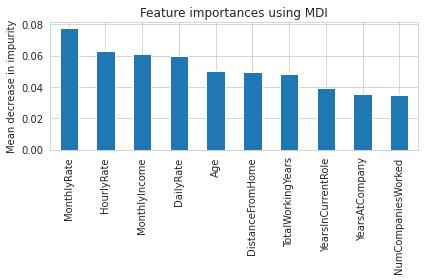

In [ ]:
forest_importances = pd.Series(best_rf['rfc'].feature_importances_, index=best_rf['normalizar'].feature_names_in_)
forest_importances = forest_importances.sort_values(ascending=False).head(10)
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

* Para el arbol de decision los features mas significativos fueron JobInvolment, dailyRate y Department_human_resources.

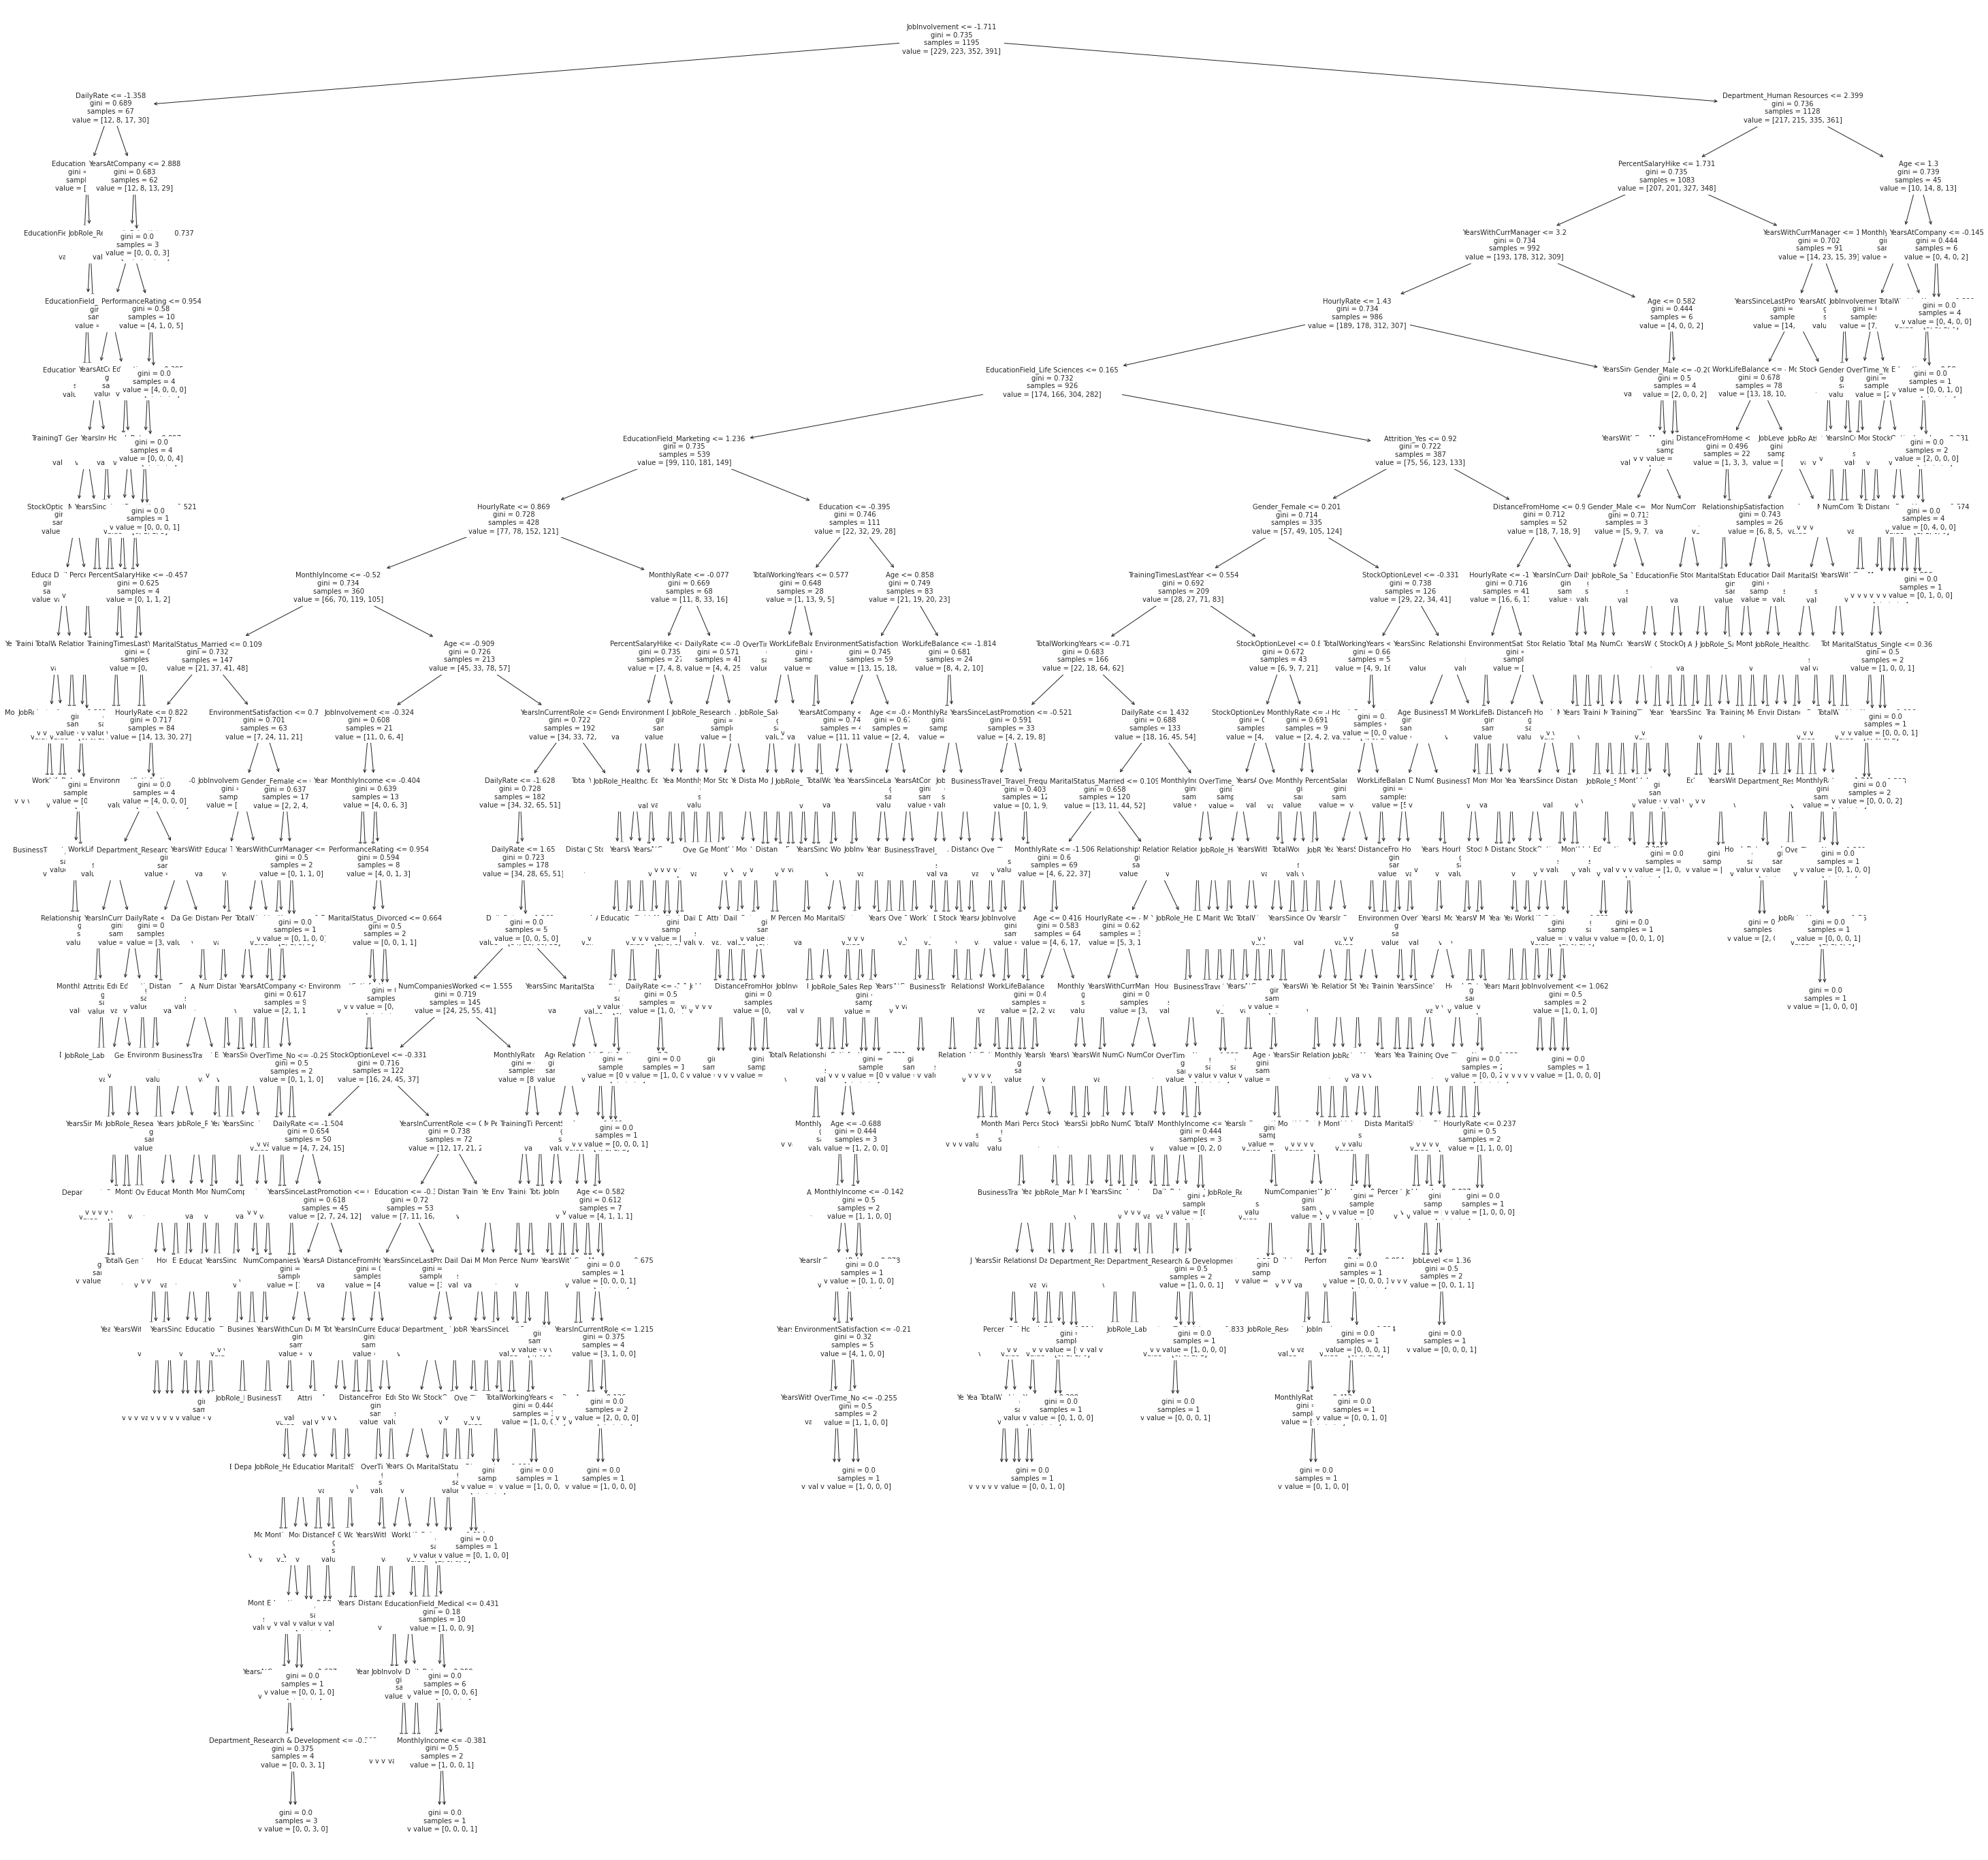

In [ ]:
plt.figure(figsize=(50,50))  # set plot size (denoted in inches)
plot_tree(best_dt['rfc'], fontsize=10, feature_names=best_dt['normalizar'].feature_names_in_)
plt.show()

Elija las 3 features más importantes de su modelo e interprete cuales son las
posibles reglas y/o efectos sobre la variable objetivo.

- Como nuestro mejor modelo fue random forest, los 3 features mas importantes serian monthly rate, hourly rate y monthly income. Probablente entre mas alta sea esta cifra, mas probable es una clasificacion a un mayor JobSatisfaction.

# 6. Evaluación

- ¿Qué métrica utilizó para escoger el mejor modelo? ¿Por qué?
  - El mejor modelo fue random forest y se utilizo el accuracy de modelo paara escoger el modelo considerando que para evaluar la satisfacción de un empleado con su trabajo es mas importante poder predecir con exactitud la satisfacion del empleado.
- Adicional a las métricas de evaluación, ¿por qué lo considera un buen modelo?
  - A pesar de ser el mejor modelo de los evaluados por tener la mejor exactitud, no fue un buen modelo, ya que teniendo en cuenta que si es escoge la variable de manera aleatoria, se supondria una linea base de 25% de accuracy, y el modelo apenas esta 7 puntos por encima. Seria necesario obtener mas datos o mejores variable para tener un modelo mas exacto. 
- Defina al menos 3 estrategias concretas para presentarlas al CEO de la
farmacéutica que permitan mejorar el nivel de satisfacción de los empleados y
evitar la fuga de personal.
  1. Estudiar un mayor numero de variables, o un historico de empleado mas grande, o integrar los datos con datos de otras empresas del mismo sector con la esperanza de obtener un mejor modelo, mas generalizable.
  2. Estudiar con atencion si los salarios de las personas que reciben menos ingresos segun su nivel de estudios, edad y experiencia son suficientemente altos para que la persona viva comodamente, de lo contrario es probable que busque otro trabajo.
  3. Estudiar el nivel de desgaste (Attrition) de un empleado, ya que puede ser una variable que juegue un papel importante en la decersión.

# 7.Estimación del nivel de satisfacción de nuevos empleados 

In [ ]:
pred

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
15,NaN,29.0,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,2,...,3,3,1,10,1,3,10.0,9,8,8
69,NaN,36.0,Yes,Travel_Rarely,318,Research & Development,9,3,Medical,4,...,3,1,1,2,0,2,1.0,0,0,0
129,NaN,49.0,No,Travel_Rarely,470,Research & Development,20,4,Medical,3,...,3,3,0,16,2,2,15.0,11,5,11
265,NaN,29.0,No,Travel_Rarely,1210,Sales,2,3,Medical,1,...,3,2,2,10,2,3,0.0,0,0,0
604,NaN,42.0,No,Travel_Rarely,933,Research & Development,29,3,Life Sciences,2,...,3,4,1,10,3,2,9.0,8,7,8
739,NaN,27.0,No,Travel_Rarely,1055,Research & Development,2,4,Life Sciences,1,...,3,2,1,4,2,3,3.0,2,2,2
844,NaN,30.0,No,Travel_Rarely,852,Sales,10,3,Marketing,3,...,3,1,1,10,3,3,10.0,3,1,4
887,NaN,42.0,No,Travel_Frequently,458,Research & Development,26,5,Medical,1,...,3,3,0,20,6,3,1.0,0,0,0
907,NaN,44.0,No,Travel_Rarely,1099,Sales,5,3,Marketing,2,...,3,3,1,26,5,3,22.0,9,3,10
990,NaN,33.0,No,Travel_Frequently,1111,Sales,5,1,Life Sciences,2,...,3,1,0,8,2,4,5.0,4,1,2


In [ ]:
pred_rt = pred.copy()
pred_rt = pred_rt.drop(columns=['JobSatisfaction'])
pred_rt

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
15,29.0,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,2,Female,...,3,3,1,10,1,3,10.0,9,8,8
69,36.0,Yes,Travel_Rarely,318,Research & Development,9,3,Medical,4,Male,...,3,1,1,2,0,2,1.0,0,0,0
129,49.0,No,Travel_Rarely,470,Research & Development,20,4,Medical,3,Female,...,3,3,0,16,2,2,15.0,11,5,11
265,29.0,No,Travel_Rarely,1210,Sales,2,3,Medical,1,Male,...,3,2,2,10,2,3,0.0,0,0,0
604,42.0,No,Travel_Rarely,933,Research & Development,29,3,Life Sciences,2,Male,...,3,4,1,10,3,2,9.0,8,7,8
739,27.0,No,Travel_Rarely,1055,Research & Development,2,4,Life Sciences,1,Female,...,3,2,1,4,2,3,3.0,2,2,2
844,30.0,No,Travel_Rarely,852,Sales,10,3,Marketing,3,Male,...,3,1,1,10,3,3,10.0,3,1,4
887,42.0,No,Travel_Frequently,458,Research & Development,26,5,Medical,1,Female,...,3,3,0,20,6,3,1.0,0,0,0
907,44.0,No,Travel_Rarely,1099,Sales,5,3,Marketing,2,Male,...,3,3,1,26,5,3,22.0,9,3,10
990,33.0,No,Travel_Frequently,1111,Sales,5,1,Life Sciences,2,Male,...,3,1,0,8,2,4,5.0,4,1,2


In [ ]:
y = pd.get_dummies(pred_rt.Attrition, prefix='Attrition')
z = pd.get_dummies(pred_rt.BusinessTravel, prefix='BusinessTravel')
f = pd.get_dummies(pred_rt.Department, prefix='Department')
x = pd.get_dummies(pred_rt.EducationField, prefix='EducationField')
w = pd.get_dummies(pred_rt.Gender, prefix='Gender')
a = pd.get_dummies(pred_rt.JobRole, prefix='JobRole')
b = pd.get_dummies(pred_rt.MaritalStatus, prefix='MaritalStatus')
c = pd.get_dummies(pred_rt.OverTime, prefix='OverTime')
print(y.head())

     Attrition_No  Attrition_Yes
15              1              0
69              0              1
129             1              0
265             1              0
604             1              0


In [ ]:
pred_rt =  pred_rt.join(y).drop(columns=['Attrition'])
pred_rt =  pred_rt.join(z).drop(columns=['BusinessTravel'])
pred_rt =  pred_rt.join(f).drop(columns=['Department'])
pred_rt =  pred_rt.join(x).drop(columns=['EducationField'])
pred_rt =  pred_rt.join(w).drop(columns=['Gender'])
pred_rt =  pred_rt.join(a).drop(columns=['JobRole'])
pred_rt =  pred_rt.join(b).drop(columns=['MaritalStatus'])
pred_rt =  pred_rt.join(c).drop(columns=['OverTime'])
pred_rt

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,Gender_Male,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Divorced,MaritalStatus_Married,OverTime_No,OverTime_Yes
15,29.0,1389,21,4,2,51,4,3,9980.0,10195,...,0,0,1,0,0,0,1,0,1,0
69,36.0,318,9,3,4,79,2,1,3388.0,21777,...,1,0,0,0,1,0,0,1,0,1
129,49.0,470,20,4,3,96,3,2,6567.0,5549,...,0,0,1,0,0,0,0,1,1,0
265,29.0,1210,2,3,1,78,2,2,6644.0,3687,...,1,0,0,0,0,1,0,1,1,0
604,42.0,933,29,3,2,98,3,2,4434.0,11806,...,1,0,1,0,0,0,0,1,1,0
739,27.0,1055,2,4,1,47,3,2,4227.0,4658,...,0,0,1,0,0,0,0,1,1,0
844,30.0,852,10,3,3,72,2,2,6578.0,2706,...,1,0,0,0,0,1,0,1,1,0
887,42.0,458,26,5,1,60,3,3,13191.0,23281,...,0,0,0,1,0,0,0,1,0,1
907,44.0,1099,5,3,2,88,3,5,18213.0,8751,...,1,1,0,0,0,0,0,1,1,0
990,33.0,1111,5,1,2,61,3,2,9998.0,19293,...,1,0,0,0,0,1,0,1,1,0


In [ ]:
list(set(data_main.columns) - set(pred_rt.columns))

['EducationField_Other',
 'JobRole_Healthcare Representative',
 'JobSatisfaction',
 'Attrition_Na',
 'OverTime_Na',
 'EducationField_Human Resources',
 'JobRole_Human Resources',
 'MaritalStatus_Single',
 'JobRole_Laboratory Technician',
 'BusinessTravel_Non-Travel',
 'Department_Human Resources',
 'EducationField_Technical Degree',
 'JobRole_Sales Representative']

In [ ]:
pred_rt['EducationField_Other'] = 0
pred_rt['JobRole_Healthcare Representative'] = 0
pred_rt['Attrition_Na'] = 0
pred_rt['OverTime_Na'] = 0
pred_rt['EducationField_Human Resources'] = 0
pred_rt['JobRole_Human Resources'] = 0
pred_rt['MaritalStatus_Single'] = 0
pred_rt['JobRole_Laboratory Technician'] = 0
pred_rt['BusinessTravel_Non-Travel'] = 0
pred_rt['Department_Human Resources'] = 0
pred_rt['EducationField_Technical Degree'] = 0
pred_rt['JobRole_Sales Representative'] = 0
pred_rt.shape

(12, 54)

In [ ]:
data_main.shape

(1494, 55)

In [ ]:
list(set(pred_rt.columns) - set(data_main.columns))

[]

In [ ]:
list(set(data_main.columns) - set(pred_rt.columns))

['JobSatisfaction']

In [ ]:
y_pred = best_rf.predict(pred_rt)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([4., 3., 4., 1., 4., 3., 3., 3., 2., 4., 4., 3.])

# 8. Bono
Todos los modelos usaron al menos 1 tecnica de reducción de la dimensionalidad:
- Regresión Logistica: Variace Threshold que elimina features con baja varianza. SelectBestK con F1 score, que selecciona los mejores k features. Y regularizacion l2.
- Decision Tree Classifier: tiene 3 modelos de reduccion de dimensionalidad propios, en donde el mismo algoritmo considera el numero de feautures para realizar el split de las ramas, los cuales se exploraron en la busqueda de hiperparametros: 
If ‘sqrt’, then max_features=sqrt(n_features).
If ‘log2’, then max_features=log2(n_features).
If None, then max_features=n_features.
- KNearestNeighborhClassifier: Se uso PCA para la reduccion de dimensionalidad.
- SVMC: usa regularizacion l2 en conjunto con el kernel para la reduccion de dimensionalidad.
- Random Forest: usa el mismo metodo de decision tree.
- xgboost: Usa el mismo metodo de decision tree